# OKCupid Date App Analysis

## Introduction:

This project will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance. The information was provided by Codecademy: profiles.csv

## Project goals:

For many people, the fact that someone takes drugs is crucial when deciding to start a relationship or not with that person. Since many users did not answer this question, this project aims to determine if it is possible to predict the fact that someone takes drugs based on other variables.

## Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's tendency to have drugs, classification algorithms from the supervised learning family of machine learning models will be implemented.

## EDA (Exploratory Data Analysis)

The first thing to do is exploring the data and see what kind of variables there are, and what kind of information they give.

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [4, 4]
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('profiles.csv')

In [9]:
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

With this information, we can start exploring a little bit better every column. It's very important to have the correct type cell in order to classify and analyze data correctly. Then we'll have to manage the empty or 'NaN' cells and see what can we do with them.

First, the chart bellow is going to show the distribution of the users by age.

In [17]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64


In [19]:
df = df.fillna('did not answer')

In [21]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
essay0         0
essay1         0
essay2         0
essay3         0
essay4         0
essay5         0
essay6         0
essay7         0
essay8         0
essay9         0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64


### Age

This plot shows that most of the users are between 25 and 30 years old.

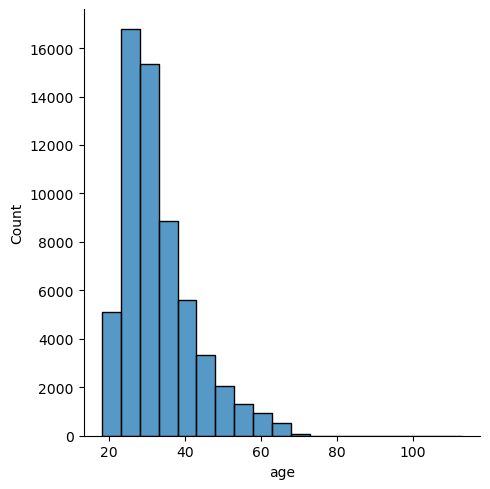

In [24]:
sns.displot(data=df, x="age", kind="hist", binwidth = 5)
plt.show()

### Sex

In order to make gender-based comparisons, it is useful to first analyze what is the percentage and number of men and women for the total amount of users.

#### Sex Distribution:

The next two plots show that there is a bigger amount of male users among the app. 

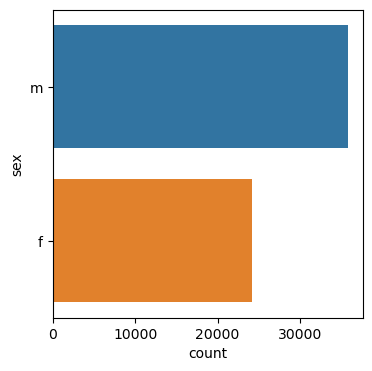

In [28]:
sns.countplot(data=df, y="sex")
plt.show()

The data shows that 60% of the total users are men and 40% are women.

In [31]:
sex_counts = df["sex"].value_counts(normalize=True) * 100
sex_percentage_df = sex_counts.reset_index()
sex_percentage_df.columns = ["sex", "percentage"]

print(sex_percentage_df)

  sex  percentage
0   m   59.768792
1   f   40.231208


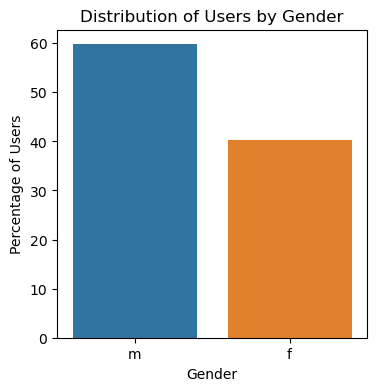

In [33]:
sns.barplot(data=sex_percentage_df, x="sex", y="percentage")
plt.ylabel("Percentage of Users")
plt.xlabel("Gender")
plt.title("Distribution of Users by Gender")
plt.show()

### Drugs

The information bellow goes deeper into the 'drugs' feature. Knowing this feature better will help to decide what are the next steps to follow.

In [36]:
print(df['drugs'].unique())

['never' 'sometimes' 'did not answer' 'often']


In [38]:
df['drugs'].value_counts()

drugs
never             37724
did not answer    14080
sometimes          7732
often               410
Name: count, dtype: int64

The next chart indicates how many people takes or does not take drugs. There is a big amount of users who didn't answer, so this is the value this project is going to try to predict. 

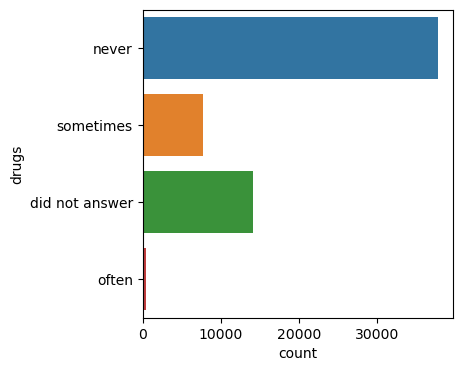

In [41]:
sns.countplot(data=df, y="drugs")
plt.show()

The comparison now focuses on gender differences. The data suggests that men report higher drug use than women. However, it is important to acknowledge the possibility that men may have been more forthcoming in their responses compared to women. Since honesty in self-reporting cannot be measured, the conclusion drawn from the available data is that drug use is more prevalent among men than women. 

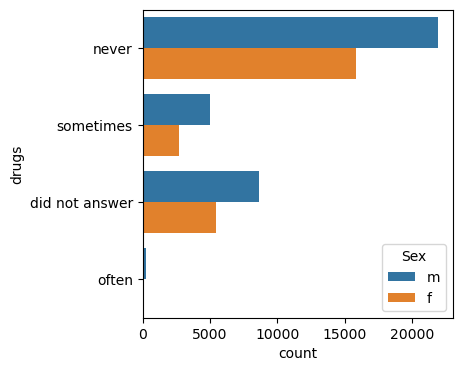

In [44]:
sns.countplot(data=df, y="drugs", hue = "sex")
plt.legend(title="Sex", loc="lower right", bbox_to_anchor=(1, 0))
plt.show()

Although the numbers in the previous chart are accurate, they do not fully reflect reality. This analysis aims to determine whether drug use is more common among men than women, and the results suggest that it is. However, since the gender distribution shows that there are more men than women using the app, the analysis should focus on the percentage within each gender rather than absolute numbers.

In [47]:
df.groupby("drugs")["sex"].value_counts()

drugs           sex
did not answer  m       8615
                f       5465
never           m      21895
                f      15829
often           m        282
                f        128
sometimes       m       5037
                f       2695
Name: count, dtype: int64

In [49]:
drug_mapping = {
    "never": 0,
    "sometimes": 1,
    "often": 2,
    "did not answer": 3
}
df["drugs_numeric"] = df["drugs"].map(drug_mapping)

In [51]:
mean_drug_use = df.groupby("sex")["drugs_numeric"].mean()
mean_drug_use_percentage = (mean_drug_use / 3) * 100
print(mean_drug_use_percentage)

sex
f    26.739091
m    29.255631
Name: drugs_numeric, dtype: float64


This plot tells us that women, on average, report 27% of the maximum possible drug use score, while men report 29%.

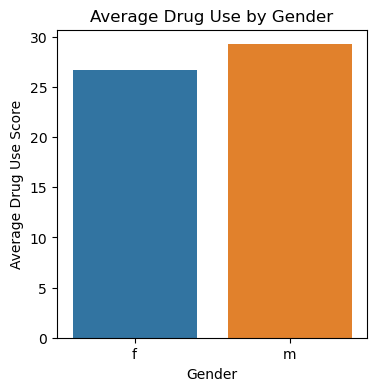

In [54]:
mean_drug_use_df = mean_drug_use_percentage.reset_index()
sns.barplot(data=mean_drug_use_df, x="sex", y="drugs_numeric")
plt.ylabel("Average Drug Use Score")
plt.xlabel("Gender")
plt.title("Average Drug Use by Gender")
plt.show()

### Drinks

The next chart shows the amount of alcohol the users consume. The number of users that drink alcohol and take drugs "often" or "very often" are pretty similar (410 for drugs and 471 for alcohol). 

In [57]:
print(df['drinks'].unique())

['socially' 'often' 'not at all' 'rarely' 'did not answer' 'very often'
 'desperately']


In [59]:
df['drinks'].value_counts()

drinks
socially          41780
rarely             5957
often              5164
not at all         3267
did not answer     2985
very often          471
desperately         322
Name: count, dtype: int64

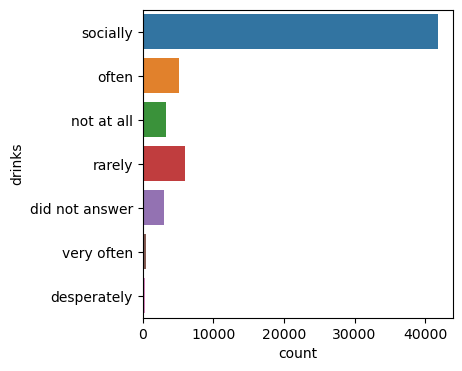

In [61]:
sns.countplot(data=df, y="drinks")
plt.show()

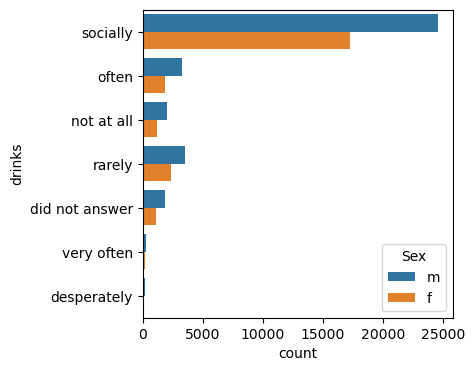

In [63]:
sns.countplot(data=df, y="drinks", hue = "sex")
plt.legend(title="Sex", loc="lower right", bbox_to_anchor=(1, 0))
plt.show()

In [65]:
df.groupby("drinks")["sex"].value_counts()

drinks          sex
desperately     m        208
                f        114
did not answer  m       1873
                f       1112
not at all      m       2034
                f       1233
often           m       3314
                f       1850
rarely          m       3549
                f       2408
socially        m      24557
                f      17223
very often      m        294
                f        177
Name: count, dtype: int64

In [67]:
drinks_mapping = {
    "desperately": 0,
    "did not answer": 1,
    "not at all": 2,
    "often": 3,
    "rarely": 4,
    "socially": 5,
    "very often": 6
}
df["drinks_numeric"] = df["drinks"].map(drinks_mapping)

In [69]:
mean_drinks = df.groupby("sex")["drinks_numeric"].mean()
mean_drinks_percentage = (mean_drinks / 6) * 100
print(mean_drinks_percentage)

sex
f    73.210460
m    71.928698
Name: drinks_numeric, dtype: float64


This plot indicates that men and women consume alcohol at almost the same rate. And just like before, percentages show better the reality.

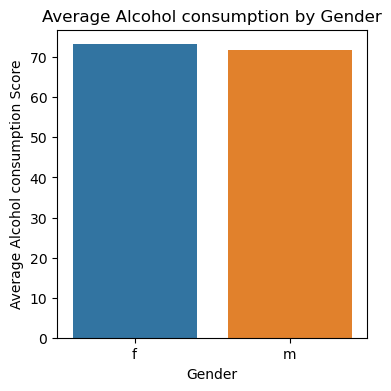

In [72]:
mean_drinks_df = mean_drinks_percentage.reset_index()
sns.barplot(data=mean_drinks_df, x="sex", y="drinks_numeric")
plt.ylabel("Average Alcohol consumption Score")
plt.xlabel("Gender")
plt.title("Average Alcohol consumption by Gender")
plt.show()

### Diet

Diet could be an important variable for a lot of reasons. In order to simplify the analysis, it is more practical to group the different kind of diets into 6 big groups.

In [75]:
print(df['diet'].unique())

['strictly anything' 'mostly other' 'anything' 'vegetarian'
 'did not answer' 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']


In [77]:
diet_mapping = {
    'strictly anything': 'anything',
    'mostly anything': 'anything',
    'anything': 'anything',
    
    'strictly vegetarian': 'vegetarian',
    'mostly vegetarian': 'vegetarian',
    'vegetarian': 'vegetarian',
    
    'strictly vegan': 'vegan',
    'mostly vegan': 'vegan',
    'vegan': 'vegan',
    
    'strictly halal': 'halal',
    'mostly halal': 'halal',
    'halal': 'halal',
    
    'strictly kosher': 'kosher',
    'mostly kosher': 'kosher',
    'kosher': 'kosher',
    
    'strictly other': 'other',
    'mostly other': 'other',
    'other': 'other'
}
df['diet'] = df['diet'].replace(diet_mapping)
print(df['diet'].unique())

['anything' 'other' 'vegetarian' 'did not answer' 'vegan' 'halal' 'kosher']


This plot indicates that the majority of users do not follow a specific diet. The second-largest group consists of those who did not respond. It is reasonable to assume that most individuals in this group eat without dietary restrictions, as people who adhere to a specific diet typically disclose it.

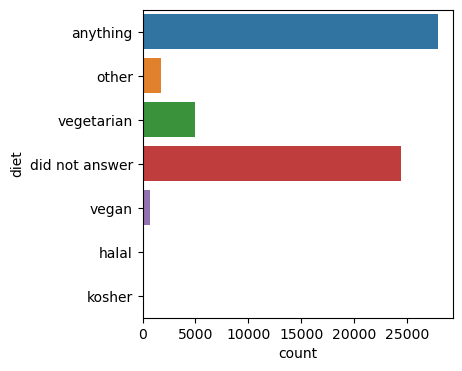

In [80]:
sns.countplot(data=df, y="diet")
plt.show()

### Body Type

This plot analyzes users' body types by gender.

In [83]:
df.groupby("body_type")["sex"].value_counts()

body_type       sex
a little extra  m      1808
                f       821
athletic        m      9510
                f      2309
average         m      9032
                f      5620
curvy           f      3811
                m       113
did not answer  f      2703
                m      2593
fit             m      8280
                f      4431
full figured    f       870
                m       139
jacked          m       292
                f       129
overweight      m       299
                f       145
rather not say  f       106
                m        92
skinny          m      1176
                f       601
thin            f      2469
                m      2242
used up         m       253
                f       102
Name: count, dtype: int64

In [85]:
body_type_counts = df.groupby("sex")["body_type"].value_counts(normalize=True) * 100
body_type_percentage_df = body_type_counts.reset_index()
body_type_percentage_df.columns = ["sex", "body_type", "percentage"]
print(body_type_percentage_df)

   sex       body_type  percentage
0    f         average   23.303064
1    f             fit   18.372932
2    f           curvy   15.802131
3    f  did not answer   11.207862
4    f            thin   10.237592
5    f        athletic    9.574159
6    f    full figured    3.607414
7    f  a little extra    3.404238
8    f          skinny    2.492018
9    f      overweight    0.601236
10   f          jacked    0.534892
11   f  rather not say    0.439524
12   f         used up    0.422938
13   m        athletic   26.542745
14   m         average   25.208630
15   m             fit   23.109771
16   m  did not answer    7.237154
17   m            thin    6.257501
18   m  a little extra    5.046192
19   m          skinny    3.282257
20   m      overweight    0.834520
21   m          jacked    0.814982
22   m         used up    0.706132
23   m    full figured    0.387954
24   m           curvy    0.315387
25   m  rather not say    0.256775


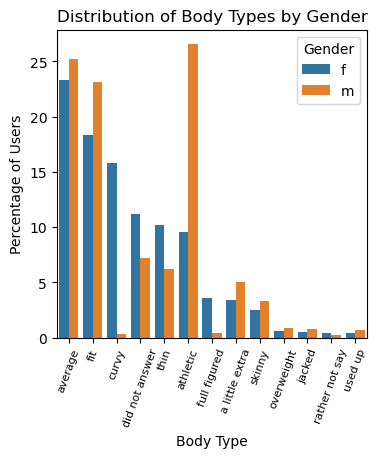

In [87]:
sns.barplot(data=body_type_percentage_df, x="body_type", y="percentage", hue="sex")
plt.xticks(rotation=70, fontsize=8)
plt.xlabel("Body Type")
plt.ylabel("Percentage of Users")
plt.title("Distribution of Body Types by Gender")
plt.legend(title="Gender")
plt.show()

### Status

The status of users is a very important feature, since this is an app for finding love, or at least have a date with someone you might like. If a user is married, in most cases it could mean that that person is not looking for somethins serious. The following plot shows the percentage of users within each category. Most users are single, which make sense. 

In [90]:
df["status"] = df["status"].replace({"available": "single"})
status_counts = df.groupby("sex")["status"].value_counts(normalize=True) * 100
status_percentage_df = status_counts.reset_index()
status_percentage_df.columns = ["sex", "status", "percentage"]
print(status_percentage_df)

  sex          status  percentage
0   f          single   95.264751
1   f  seeing someone    4.158892
2   f         married    0.559771
3   f         unknown    0.016586
4   m          single   96.533534
5   m  seeing someone    2.961288
6   m         married    0.488431
7   m         unknown    0.016746


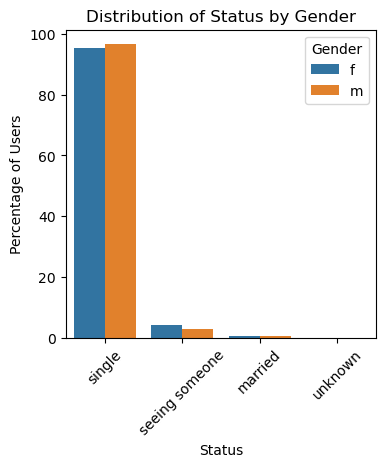

In [92]:
sns.barplot(data=status_percentage_df, x="status", y="percentage", hue="sex")
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Status")
plt.ylabel("Percentage of Users")
plt.title("Distribution of Status by Gender")
plt.legend(title="Gender")
plt.show()

### Offspring

Parenthood may be a significant factor influencing drug consumption. Many individuals quit drug use completely when they have children, suggesting that the likelihood of drug use is higher among those without offspring compared to those who are parents.

In [95]:
print(df['offspring'].unique())

['doesn&rsquo;t have kids, but might want them' 'did not answer'
 'doesn&rsquo;t want kids' 'doesn&rsquo;t have kids, but wants them'
 'doesn&rsquo;t have kids' 'wants kids' 'has a kid' 'has kids'
 'doesn&rsquo;t have kids, and doesn&rsquo;t want any'
 'has kids, but doesn&rsquo;t want more'
 'has a kid, but doesn&rsquo;t want more' 'has a kid, and wants more'
 'has kids, and might want more' 'might want kids'
 'has a kid, and might want more' 'has kids, and wants more']


The values in the "offspring" feature are inconsistent and unclear. For the purposes of this analysis, they need to be standardized and reinterpreted to enhance readability and ensure accurate insights.

In [98]:
df["offspring"] = df["offspring"].fillna("did not answer")
df['offspring'] = df['offspring'].str.replace("doesn&rsquo;t", "doesn't", regex=False)
print(df['offspring'].unique())

["doesn't have kids, but might want them" 'did not answer'
 "doesn't want kids" "doesn't have kids, but wants them"
 "doesn't have kids" 'wants kids' 'has a kid' 'has kids'
 "doesn't have kids, and doesn't want any"
 "has kids, but doesn't want more" "has a kid, but doesn't want more"
 'has a kid, and wants more' 'has kids, and might want more'
 'might want kids' 'has a kid, and might want more'
 'has kids, and wants more']


For the purpose of this project, the only relevant factor is whether users have children or not. Their desire to have children in the future is not considered in this analysis. Therefore, the values in this category need to be simplified accordingly.

In [101]:
def categorize_offspring(value):
    if "has a kid" in value or "has kids" in value:
        return "has kids"
    else: 
        return "doesn't have kids"
df["offspring"] = df["offspring"].apply(categorize_offspring)
print(df['offspring'].unique()) 

["doesn't have kids" 'has kids']


The following plot shows that the majority of users don't have kids.

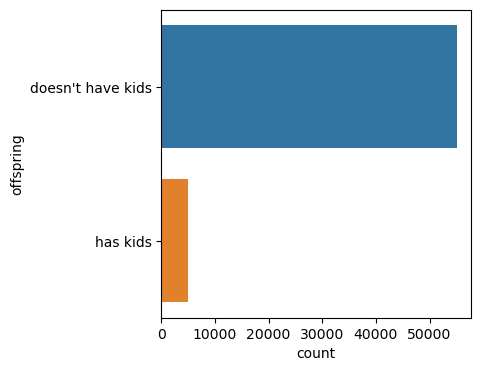

In [104]:
sns.countplot(data=df, y="offspring")
plt.show()

## Preprocess Data

As we explored the data, we simultaneously preprocessed and simplified relevant features that might influence the target variable, ensuring the dataset was prepared for modeling.

In [108]:
print(df.dtypes[df.dtypes == "object"])

body_type      object
diet           object
drinks         object
drugs          object
education      object
essay0         object
essay1         object
essay2         object
essay3         object
essay4         object
essay5         object
essay6         object
essay7         object
essay8         object
essay9         object
ethnicity      object
height         object
job            object
last_online    object
location       object
offspring      object
orientation    object
pets           object
religion       object
sex            object
sign           object
smokes         object
speaks         object
status         object
dtype: object


Since, the dataset is too big, let's remove the columns that have more weight, so that the model can perform better.

In [111]:
df = df.drop(columns=["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", 
                      "essay6", "essay7", "essay8", "essay9", "ethnicity", "height", "last_online", "location", "orientation", "sign",
                     "speaks"], errors="ignore")

To have more balance of classes, the best thing is to group two classes into one, so that we have only two.

In [114]:
df["drugs"] = df["drugs"].map({"never": 0, "did not answer": 0, "sometimes": 1, "often": 1})
print(df["drugs"].unique())
print(df["drugs"].value_counts())

[0 1]
drugs
0    51804
1     8142
Name: count, dtype: int64


In [116]:
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'income',
       'job', 'offspring', 'pets', 'religion', 'sex', 'smokes', 'status',
       'drugs_numeric', 'drinks_numeric'],
      dtype='object')


In [118]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["drinks", "smokes", "education", "diet", "pets", "religion", 
                    "status", "body_type", "offspring", "job", "sex"]
encoder = LabelEncoder()
for col in ["drinks", "smokes", "education"]:  
    df[col] = encoder.fit_transform(df[col])
df = pd.get_dummies(df, columns=["diet", "pets", "religion", "status", "body_type", "offspring", "job", "sex"], drop_first=True)
print(df.dtypes) 

age                                 int64
drinks                              int32
drugs                               int64
education                           int32
income                              int64
                                    ...  
job_science / tech / engineering     bool
job_student                          bool
job_transportation                   bool
job_unemployed                       bool
sex_m                                bool
Length: 112, dtype: object


In [120]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["drugs"])
y = df["drugs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (47956, 111), (47956,)
Test set: (11990, 111), (11990,)


## Build Models

The first model to use is Logistic Regression, since this is a classification problem with two possible results.

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")

Logistic Regression Accuracy: 0.87


The Support Vector Machine (SVM) could also potentially be useful for this type of prediction.

In [127]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.87


The metrics below show that the SVM model does not perform well in predicting users who take drugs ('Sometimes'/'Often')

## Evaluate Models

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10381
           1       0.00      0.00      0.00      1609

    accuracy                           0.87     11990
   macro avg       0.43      0.50      0.46     11990
weighted avg       0.75      0.87      0.80     11990

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     10381
           1       0.50      0.10      0.16      1609

    accuracy                           0.87     11990
   macro avg       0.69      0.54      0.55     11990
weighted avg       0.83      0.87      0.82     11990



Let's do some hyperparameter tuning in our Logistic Regression model to see if it works better. The hyperparameter "class_weight" was added, in a ratio of 1 to 6, because there are 6 times more users that do not take drugs than users that take them.
1. Recall for Class 1 (Drug Users) Improved
Before: Recall = 0.10
Now: Recall = 0.63 (much higher)
This means the model catches better portion of actual drug users.

2. Precision for Class 1 Decreased
Before: Precision = 0.50
Now: Precision = 0.28 (decrease)
The model is making fewer false positives but more realistic.

3. Overall Accuracy Decreased
Before: 0.87
Now: 0.73
This means the model is still good at overall predictions.

4. Weighted F1-score Improved
Before: Weighted avg F1-score = 0.82
Now: Weighted avg F1-score = 0.77
The balance between precision & recall declined slightly.

The results got a little bit worse but with the real proportion for both classes.


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(class_weight={0: 1, 1: 6}, max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")

Logistic Regression Accuracy: 0.73


In [136]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83     10381
           1       0.28      0.63      0.39      1609

    accuracy                           0.73     11990
   macro avg       0.60      0.69      0.61     11990
weighted avg       0.84      0.73      0.77     11990



This confusion matrix shows how well the Logistic Regression model predicts drug use. The top left square (7736) represents correctly identified Non-Drug Users, while the top right (2645) shows Non-Drug Users mistakenly classified as Drug Users. The bottom left and bottom right squares indicate that the model struggles to correctly identify Drug Users, meaning it tends to classify most people as Non-Drug Users. This suggests an imbalance in the predictions, which will require further model adjustments.

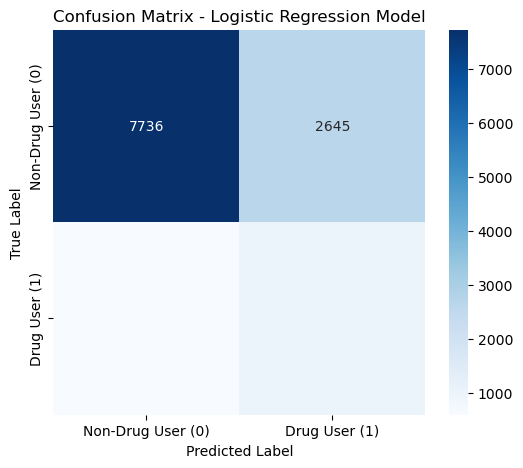

In [139]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Drug User (0)", "Drug User (1)"], yticklabels=["Non-Drug User (0)", "Drug User (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

This confusion matrix shows how the Logistic Regression model predicts drug use. The top left (7736) represents correctly classified Non-Drug Users, while the top right (2645) shows Non-Drug Users that were incorrectly predicted as Drug Users. The bottom left and bottom right squares indicate that the model barely identifies Drug Users correctly, meaning it predominantly predicts most individuals as Non-Drug Users. This suggests a need for further model improvements, possibly by adjusting class weights or exploring different algorithms.

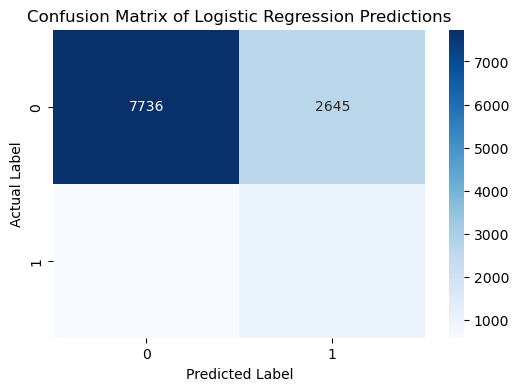

In [142]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})
results_counts = results_df.groupby(['Actual', 'Predicted']).size().unstack()
plt.figure(figsize=(6, 4))
sns.heatmap(results_counts, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of Logistic Regression Predictions")
plt.show()

## Conclusions

For this prediction, wether a user takes drugs or not, the Support Vector Machine is not a useful model. Logistic Regression worked a little bit better, but still don't give the expected results, but with some hyperparameter tuning, oversampling or feature importance selection, we could probably get better results. The imbalance of both classes are an issue to address in order to get better results with our model.

## Next Steps

One key improvement could have been to consider feature importance and class imbalance more carefully from the start. Moving forward, exploring other models such as K-Nearest Neighbors (KNN) or Random Forest could provide better predictions. Additionally, fine-tuning hyperparameters and testing different resampling techniques might improve model performance.

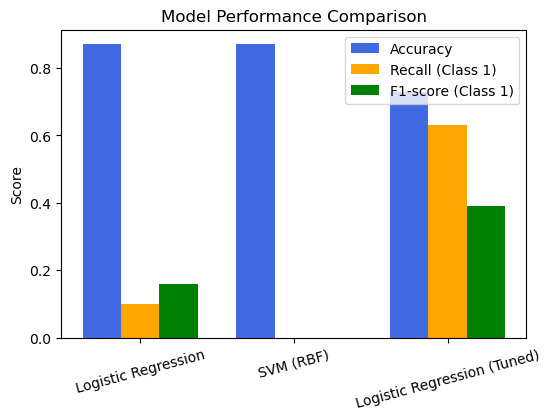

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracy scores
models = ["Logistic Regression", "SVM (RBF)", "Logistic Regression (Tuned)"]
accuracy_scores = [0.87, 0.87, 0.73]  # Accuracy values
recall_scores = [0.10, 0.00, 0.63]  # Recall for Drug Users (Class 1)
f1_scores = [0.16, 0.00, 0.39]  # F1-score for Drug Users (Class 1)

# X-axis positions
x = np.arange(len(models))

# Bar chart
fig, ax = plt.subplots(figsize=(6,4))
bar_width = 0.25

ax.bar(x - bar_width, accuracy_scores, bar_width, label="Accuracy", color='royalblue')
ax.bar(x, recall_scores, bar_width, label="Recall (Class 1)", color='orange')
ax.bar(x + bar_width, f1_scores, bar_width, label="F1-score (Class 1)", color='green')

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend()

plt.show()